# Microsoft Movie Studios

Author: Mario Mocombe

**Overview**

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions to consider:

* What are the business's plan points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?

## Data Understanding

Note that this data may not reflect the most up-to-date box office information.


1) im.db.zip 

    A zipped SQLite database containing movie data from the website Internet Movie Data Base.  The most relevant tables are         movie_basics and movie_ratings.

2) bom.movie_gross.csv.gz

    A compressed CSV file containing box office data from the website Box Office Mojo.

Questions to consider:

* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?


In [1]:
##Import Standard Packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1 IMDB DATABASE

In [2]:
### making a connection with the IMDB DATABASE using SQLite3
conn = sqlite3.connect('zippedData/im.db')

In [3]:
### setting up a cursor so I'm able to move through the database.
### Let's continue on and create a cursor.
##A cursor object is what can actually execute SQL commands. You create it by calling .cursor() on the connection.

cur = conn.cursor()
# (This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [4]:
## Use the fetchall method to find out the table names
## Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [5]:
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
pd.read_sql("SELECT * FROM movie_ratings ORDER BY movie_id;", conn)

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [122]:
z= """
SELECT primary_title, runtime_minutes, genres, averagerating, numvotes 
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
ORDER BY primary_title DESC
;
"""
imdbT = pd.read_sql(z, conn)

In [157]:
imdbT.tail(66965)

,primary_title,runtime_minutes,genres,averagerating,numvotes
6891,Titanic: 100 Years On,70.0,None,7.4,27
6892,"Titanic, l'ultime scénario",52.0,Documentary,7.6,5
6893,Titanic Review,61.0,Comedy,8.5,355
6894,Titanic,NaN,Adventure,6.2,20
6895,Tist' dan v tednu,119.0,Documentary,9.2,16
...,...,...,...,...,...
73851,#ALLMYMOVIES,NaN,Documentary,8.3,21
73852,#66,116.0,Action,5.3,18
73853,#5,68.0,"Biography,Comedy,Fantasy",6.8,6
73854,#1 Serial Killer,87.0,Horror,5.6,40


In [130]:
#########KEEP#########################

s = """
SELECT primary_title, runtime_minutes, genres, averagerating, numvotes 
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE numvotes > 65000
ORDER BY numvotes DESC
;
"""
imdb = pd.read_sql(s, conn)
#######################################

In [8]:
imdb

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
2,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,165.0,"Drama,Western",8.4,1211405
4,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
905,Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,65656
906,The Sitter,81.0,Comedy,5.7,65575
907,The Iceman,106.0,"Biography,Crime,Drama",6.9,65571
908,Inside Job,109.0,"Crime,Documentary",8.3,65304


In [9]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    910 non-null    object 
 1   runtime_minutes  910 non-null    float64
 2   genres           910 non-null    object 
 3   averagerating    910 non-null    float64
 4   numvotes         910 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 35.7+ KB


In [10]:
imdb.dropna(inplace=True)

In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 909
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    910 non-null    object 
 1   runtime_minutes  910 non-null    float64
 2   genres           910 non-null    object 
 3   averagerating    910 non-null    float64
 4   numvotes         910 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 42.7+ KB


In [12]:
imdb.head(60)

,primary_title,runtime_minutes,genres,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
2,Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,165.0,"Drama,Western",8.4,1211405
4,The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,138.0,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,108.0,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,142.0,"Action,Adventure,Sci-Fi",7.2,795227


In [13]:
imdb.describe()

,runtime_minutes,averagerating,numvotes
count,910.000000,910.000000,9.100000e+02
mean,114.015385,6.809121,2.040407e+05
std,18.827682,0.837996,1.791473e+05
min,80.000000,1.600000,6.520200e+04
25%,101.000000,6.300000,9.016400e+04
50%,111.000000,6.800000,1.381810e+05
75%,124.000000,7.400000,2.394260e+05
max,321.000000,9.300000,1.841066e+06


## Data Preparation
Describe and justify the process for preparing the data for analysis.

Questions to consider:

* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?

In [14]:
imdb.value_counts()

primary_title                               runtime_minutes  genres                      averagerating  numvotes
xXx: Return of Xander Cage                  107.0            Action,Adventure,Thriller   5.2            77976       1
Horns                                       120.0            Crime,Drama,Fantasy         6.5            70040       1
Inception                                   148.0            Action,Adventure,Sci-Fi     8.8            1841066     1
Incendies                                   131.0            Drama,Mystery,War           8.3            124156      1
In the Heart of the Sea                     122.0            Action,Adventure,Biography  6.9            108628      1
                                                                                                                   ..
Star Wars: Episode VII - The Force Awakens  136.0            Action,Adventure,Fantasy    8.0            784780      1
Star Trek Into Darkness                     132.0            

In [15]:
imdb.duplicated().value_counts()

False    910
dtype: int64

In [16]:
####SELECT FROM WHERE
    ###Genre LIKE '%Action%'

In [17]:
###DEL combined_df = pd.concat([x, y], axis=1, join='inner')

In [18]:
###  combined_df

# ################################################################

In [19]:
##TEST TEST#########---HIGHEST GROSSING ACTOR/ACTRESS---#####################

q = """
SELECT primary_title, runtime_minutes, genres, category, primary_name, averagerating, numvotes 
FROM principals
JOIN movie_ratings
USING (movie_id)
JOIN movie_basics
USING (movie_id)
JOIN persons
USING (person_id)
WHERE category = "actress"
OR category = "actor"
ORDER BY numvotes DESC;
"""
imdb2 = pd.read_sql(q, conn)
#######################################

In [20]:
#### add where num votes > 25000

In [21]:
imdb2.head(60)

,primary_title,runtime_minutes,genres,category,primary_name,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Leonardo DiCaprio,8.8,1841066
1,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Joseph Gordon-Levitt,8.8,1841066
2,Inception,148.0,"Action,Adventure,Sci-Fi",actress,Ellen Page,8.8,1841066
3,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Ken Watanabe,8.8,1841066
4,The Dark Knight Rises,164.0,"Action,Thriller",actor,Christian Bale,8.4,1387769
5,The Dark Knight Rises,164.0,"Action,Thriller",actor,Tom Hardy,8.4,1387769
6,The Dark Knight Rises,164.0,"Action,Thriller",actress,Anne Hathaway,8.4,1387769
7,The Dark Knight Rises,164.0,"Action,Thriller",actor,Gary Oldman,8.4,1387769
8,Interstellar,169.0,"Adventure,Drama,Sci-Fi",actor,Matthew McConaughey,8.6,1299334
9,Interstellar,169.0,"Adventure,Drama,Sci-Fi",actress,Anne Hathaway,8.6,1299334


In [22]:
imdb2

,primary_title,runtime_minutes,genres,category,primary_name,averagerating,numvotes
0,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Leonardo DiCaprio,8.8,1841066
1,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Joseph Gordon-Levitt,8.8,1841066
2,Inception,148.0,"Action,Adventure,Sci-Fi",actress,Ellen Page,8.8,1841066
3,Inception,148.0,"Action,Adventure,Sci-Fi",actor,Ken Watanabe,8.8,1841066
4,The Dark Knight Rises,164.0,"Action,Thriller",actor,Christian Bale,8.4,1387769
...,...,...,...,...,...,...,...
248295,Casting Chloe,NaN,"Comedy,Drama",actress,Sarah Jones Dittmeier,8.2,5
248296,Casting Chloe,NaN,"Comedy,Drama",actress,Annabelle Fox,8.2,5
248297,American Dope: Acid Dreams,53.0,Documentary,actor,Alan Bradley,8.2,5
248298,American Dope: Acid Dreams,53.0,Documentary,actor,Michael Levine,8.2,5


In [23]:
####TEST####
imdb2['primary_name'].value_counts()

Eric Roberts      122
Brahmanandam       74
Prakash Raj        74
Tom Sizemore       61
Michael Madsen     59
                 ... 
John Anantua        1
Zoran Herceg        1
Yansu Wang          1
Gavin Andrus        1
Ruihan Zhang        1
Name: primary_name, Length: 142527, dtype: int64

In [24]:
####TEST####
imdb2['genres'].value_counts().head(20)

Drama                   48535
Comedy                  24363
Horror                  12110
Comedy,Drama            11008
Thriller                 6608
Drama,Romance            6301
Documentary              6247
Comedy,Romance           5339
Comedy,Drama,Romance     5056
Action                   4502
Horror,Thriller          4225
Drama,Thriller           4140
Romance                  3094
Comedy,Horror            2551
Action,Crime,Drama       2399
Crime,Drama,Thriller     2093
Crime,Drama              2079
Family                   2015
Drama,Family             1980
Action,Drama             1738
Name: genres, dtype: int64

# 2 BOX OFFICE MOJO

In [25]:
##Loading up the first dataframe, BOX OFFICE MOJO, with Pandas.Importing Data
# Import the file and print the first 5 rows
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [26]:
bom.info()
### CHANGE FOREIGN GROSS TO FLOAT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [27]:
## bom['foreign_gross'].astype(float)
##Gives Error: could not convert string to float: '1,131.6'

In [28]:
## bom['foreign_gross'].astype(int)
##Gives Error: cannot convert float NaN to integer

In [29]:
### sorting the values by domestic gross, we see that the foreign gross is off for 3 of the top results and for Furious 7.
bom.sort_values(by=['domestic_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [30]:
### sorting the values by foreign gross, we see that the top 5 results are wildly popular franchises with a little over $1k gross.
bom.sort_values(by=['foreign_gross'])

,title,studio,domestic_gross,foreign_gross,year
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
## REPLACE the erroneous values with more realistic ones.  The five entries were most likely meant to contain billions in gross.
bom['foreign_gross'] = bom['foreign_gross'].replace(['1,010.0','1,019.4','1,131.6', '1,163.0','1,369.5'], ['1010000000', '1019000000', '1131000000', '1163000000', '1369000000'])

In [32]:
#check to see if the values changed
bom.sort_values(by=['domestic_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131000000,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369000000,2018
1873,Jurassic World,Uni.,652300000.0,1019000000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


In [33]:
bom.dropna(inplace=True)

In [34]:
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [35]:
#### convert 'domestic gross' column from object to float########
bom['domestic_gross'] = bom['domestic_gross'].astype(int)

In [36]:
#### convert 'foreign gross' column from object to float########
bom['foreign_gross'] = bom['foreign_gross'].astype(int)

In [37]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int32 
 3   foreign_gross   2007 non-null   int32 
 4   year            2007 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 78.4+ KB


In [38]:
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']

In [39]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018,1501400
3286,The Catcher Was a Spy,IFC,725000,229000,2018,954000
3309,Time Freak,Grindstone,10000,256000,2018,266000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018,98400


In [40]:
bom.sort_values(by=['total_gross'],ascending=False)

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000,1131000000,2015,2067700000
3079,Avengers: Infinity War,BV,678800000,1369000000,2018,2047800000
1873,Jurassic World,Uni.,652300000,1019000000,2015,1671300000
727,Marvel's The Avengers,BV,623400000,895500000,2012,1518900000
1874,Furious 7,Uni.,353000000,1163000000,2015,1516000000
...,...,...,...,...,...,...
711,I'm Glad My Mother is Alive,Strand,8700,13200,2011,21900
322,The Thorn in the Heart,Osci.,7400,10500,2010,17900
1110,Cirkus Columbia,Strand,3500,9500,2012,13000
715,Aurora,CGld,5700,5100,2011,10800


In [41]:
bom = bom.drop(['studio', 'year'], axis=1)

In [42]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   domestic_gross  2007 non-null   int32 
 2   foreign_gross   2007 non-null   int32 
 3   total_gross     2007 non-null   int32 
dtypes: int32(3), object(1)
memory usage: 54.9+ KB


In [43]:
bom

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000,652000000,1067000000
1,Alice in Wonderland (2010),334200000,691300000,1025500000
2,Harry Potter and the Deathly Hallows Part 1,296000000,664300000,960300000
3,Inception,292600000,535700000,828300000
4,Shrek Forever After,238700000,513900000,752600000
...,...,...,...,...
3275,I Still See You,1400,1500000,1501400
3286,The Catcher Was a Spy,725000,229000,954000
3309,Time Freak,10000,256000,266000
3342,Reign of Judges: Title of Liberty - Concept Short,93200,5200,98400


In [44]:
bom.sort_values(by=['total_gross'],ascending=False).head(60)

,title,domestic_gross,foreign_gross,total_gross
1872,Star Wars: The Force Awakens,936700000,1131000000,2067700000
3079,Avengers: Infinity War,678800000,1369000000,2047800000
1873,Jurassic World,652300000,1019000000,1671300000
727,Marvel's The Avengers,623400000,895500000,1518900000
1874,Furious 7,353000000,1163000000,1516000000
1875,Avengers: Age of Ultron,459000000,946400000,1405400000
3080,Black Panther,700100000,646900000,1347000000
328,Harry Potter and the Deathly Hallows Part 2,381000000,960500000,1341500000
2758,Star Wars: The Last Jedi,620200000,712400000,1332600000
3081,Jurassic World: Fallen Kingdom,417700000,891800000,1309500000


In [45]:
bom.describe()

,domestic_gross,foreign_gross,total_gross
count,2.007000e+03,2.007000e+03,2.007000e+03
mean,4.701984e+07,7.862646e+07,1.256463e+08
std,8.162689e+07,1.480804e+08,2.211996e+08
min,4.000000e+02,6.000000e+02,4.900000e+03
25%,6.700000e+05,4.000000e+06,8.239000e+06
50%,1.670000e+07,1.970000e+07,4.240000e+07
75%,5.605000e+07,7.775000e+07,1.337500e+08
max,9.367000e+08,1.369000e+09,2.067700e+09


In [46]:
bom.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'total_gross'], dtype='object')

In [47]:
bom.isna().sum()

title             0
domestic_gross    0
foreign_gross     0
total_gross       0
dtype: int64

In [48]:
bom.dtypes

###change foreign_gross into float

title             object
domestic_gross     int32
foreign_gross      int32
total_gross        int32
dtype: object

In [49]:
bom.head(20)

,title,domestic_gross,foreign_gross,total_gross
0,Toy Story 3,415000000,652000000,1067000000
1,Alice in Wonderland (2010),334200000,691300000,1025500000
2,Harry Potter and the Deathly Hallows Part 1,296000000,664300000,960300000
3,Inception,292600000,535700000,828300000
4,Shrek Forever After,238700000,513900000,752600000
5,The Twilight Saga: Eclipse,300500000,398000000,698500000
6,Iron Man 2,312400000,311500000,623900000
7,Tangled,200800000,391000000,591800000
8,Despicable Me,251500000,291600000,543100000
9,How to Train Your Dragon,217600000,277300000,494900000


In [50]:
bom.shape

(2007, 4)

## JOINING DATAFRAMES

In [51]:
bom.set_index('title', inplace=True)

In [52]:
bom.head()

,domestic_gross,foreign_gross,total_gross
title,,,
Toy Story 3,415000000,652000000,1067000000
Alice in Wonderland (2010),334200000,691300000,1025500000
Harry Potter and the Deathly Hallows Part 1,296000000,664300000,960300000
Inception,292600000,535700000,828300000
Shrek Forever After,238700000,513900000,752600000


In [53]:
imdb.set_index('primary_title', inplace=True)

In [54]:
imdb

,runtime_minutes,genres,averagerating,numvotes
primary_title,,,,
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
Django Unchained,165.0,"Drama,Western",8.4,1211405
The Avengers,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...
Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,65656
The Sitter,81.0,Comedy,5.7,65575
The Iceman,106.0,"Biography,Crime,Drama",6.9,65571


In [55]:
joined_df = imdb.join(bom, how='inner')

joined_df

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,292600000,535700000,828300000
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000,636800000,1084900000
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000,489400000,677400000
Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000,262600000,425400000
The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000,275100000,392000000
...,...,...,...,...,...,...,...
What to Expect When You're Expecting,110.0,"Comedy,Drama,Romance",5.7,65890,41200000,43200000,84400000
Dark Skies,97.0,"Horror,Sci-Fi,Thriller",6.3,65754,17400000,9000000,26400000
Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,65656,20200000,234000000,254200000
The Sitter,81.0,Comedy,5.7,65575,30400000,4500000,34900000


In [56]:
joined_df.sort_values(by=['numvotes'], ascending=False).head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,292600000,535700000,828300000
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000,636800000,1084900000
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000,489400000,677400000
Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000,262600000,425400000
The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000,275100000,392000000
Shutter Island,138.0,"Mystery,Thriller",8.1,1005960,128000000,166800000,294800000
Guardians of the Galaxy,121.0,"Action,Adventure,Comedy",8.1,948394,333200000,440200000,773400000
Deadpool,108.0,"Action,Adventure,Comedy",8.0,820847,363100000,420000000,783100000
The Hunger Games,142.0,"Action,Adventure,Sci-Fi",7.2,795227,408000000,286400000,694400000
Mad Max: Fury Road,120.0,"Action,Adventure,Sci-Fi",8.1,780910,153600000,224800000,378400000


In [57]:
joined_df.sort_values(by=['total_gross'], ascending=False).head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000,1369000000,2047800000
Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000,1019000000,1671300000
Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000,1163000000,1516000000
Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000,946400000,1405400000
Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000,646900000,1347000000
Star Wars: The Last Jedi,152.0,"Action,Adventure,Fantasy",7.1,462903,620200000,712400000,1332600000
Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000,891800000,1309500000
Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000,875700000,1276400000
Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510,608600000,634200000,1242800000
The Fate of the Furious,136.0,"Action,Crime,Thriller",6.7,179774,226000000,1010000000,1236000000


# 3 THE NUMBERS

In [58]:
##Loading up the third dataframe, THE NUMBERS, with Pandas.
numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [59]:
numbers = numbers.drop(['id', 'domestic_gross'], axis=1)

In [60]:
numbers.set_index('movie', inplace=True)

In [61]:
numbers.head()

,release_date,production_budget,worldwide_gross
movie,,,
Avatar,"Dec 18, 2009","$425,000,000","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,"May 20, 2011","$410,600,000","$1,045,663,875"
Dark Phoenix,"Jun 7, 2019","$350,000,000","$149,762,350"
Avengers: Age of Ultron,"May 1, 2015","$330,600,000","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,"Dec 15, 2017","$317,000,000","$1,316,721,747"


In [62]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   production_budget  5782 non-null   object
 2   worldwide_gross    5782 non-null   object
dtypes: object(3)
memory usage: 180.7+ KB


In [63]:
numbers['release_date'] = pd.to_datetime(numbers['release_date'])

In [64]:
numbers.head(60)

,release_date,production_budget,worldwide_gross
movie,,,
Avatar,2009-12-18,"$425,000,000","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2011-05-20,"$410,600,000","$1,045,663,875"
Dark Phoenix,2019-06-07,"$350,000,000","$149,762,350"
Avengers: Age of Ultron,2015-05-01,"$330,600,000","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,2017-12-15,"$317,000,000","$1,316,721,747"
Star Wars Ep. VII: The Force Awakens,2015-12-18,"$306,000,000","$2,053,311,220"
Avengers: Infinity War,2018-04-27,"$300,000,000","$2,048,134,200"
Pirates of the Caribbean: At Worldâs End,2007-05-24,"$300,000,000","$963,420,425"
Justice League,2017-11-17,"$300,000,000","$655,945,209"


In [65]:
numbers['production_budget']= numbers['production_budget'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [66]:
numbers['production_budget']

movie
Avatar                                         425000000.0
Pirates of the Caribbean: On Stranger Tides    410600000.0
Dark Phoenix                                   350000000.0
Avengers: Age of Ultron                        330600000.0
Star Wars Ep. VIII: The Last Jedi              317000000.0
                                                  ...     
Red 11                                              7000.0
Following                                           6000.0
Return to the Land of Wonders                       5000.0
A Plague So Pleasant                                1400.0
My Date With Drew                                   1100.0
Name: production_budget, Length: 5782, dtype: float64

In [67]:
numbers['worldwide_gross']= numbers['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [68]:
numbers['worldwide_gross']

movie
Avatar                                         2.776345e+09
Pirates of the Caribbean: On Stranger Tides    1.045664e+09
Dark Phoenix                                   1.497624e+08
Avengers: Age of Ultron                        1.403014e+09
Star Wars Ep. VIII: The Last Jedi              1.316722e+09
                                                   ...     
Red 11                                         0.000000e+00
Following                                      2.404950e+05
Return to the Land of Wonders                  1.338000e+03
A Plague So Pleasant                           0.000000e+00
My Date With Drew                              1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [69]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   production_budget  5782 non-null   float64       
 2   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 340.7+ KB


In [70]:
numbers['roi'] = numbers['worldwide_gross'] - numbers['production_budget']

In [71]:
numbers.head(60)

,release_date,production_budget,worldwide_gross,roi
movie,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,6.350639e+08
Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,-2.002376e+08
Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,1.072414e+09
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000.0,1.316722e+09,9.997217e+08
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000.0,2.053311e+09,1.747311e+09
Avengers: Infinity War,2018-04-27,300000000.0,2.048134e+09,1.748134e+09
Pirates of the Caribbean: At Worldâs End,2007-05-24,300000000.0,9.634204e+08,6.634204e+08
Justice League,2017-11-17,300000000.0,6.559452e+08,3.559452e+08


In [119]:
numbers.sort_values(by=['roi'], ascending=False).head(60)

,release_date,production_budget,worldwide_gross,roi
movie,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,2.351345e+09
Titanic,1997-12-19,200000000.0,2.208208e+09,2.008208e+09
Avengers: Infinity War,2018-04-27,300000000.0,2.048134e+09,1.748134e+09
Star Wars Ep. VII: The Force Awakens,2015-12-18,306000000.0,2.053311e+09,1.747311e+09
Jurassic World,2015-06-12,215000000.0,1.648855e+09,1.433855e+09
Furious 7,2015-04-03,190000000.0,1.518723e+09,1.328723e+09
The Avengers,2012-05-04,225000000.0,1.517936e+09,1.292936e+09
Harry Potter and the Deathly Hallows: Part II,2011-07-15,125000000.0,1.341693e+09,1.216693e+09
Black Panther,2018-02-16,200000000.0,1.348258e+09,1.148258e+09


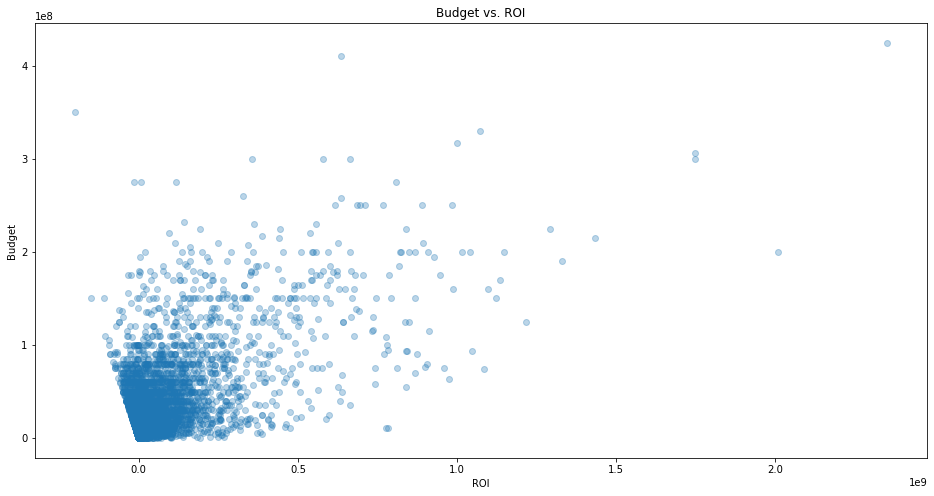

In [117]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=numbers['roi'],
    y=numbers['production_budget'],
    alpha=0.3
)

ax.set_xlabel("ROI")
ax.set_ylabel("Budget")
ax.set_title("Budget vs. ROI");

In [73]:
numbers

,release_date,production_budget,worldwide_gross,roi
movie,,,,
Avatar,2009-12-18,425000000.0,2.776345e+09,2.351345e+09
Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,6.350639e+08
Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,-2.002376e+08
Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,1.072414e+09
Star Wars Ep. VIII: The Last Jedi,2017-12-15,317000000.0,1.316722e+09,9.997217e+08
...,...,...,...,...
Red 11,2018-12-31,7000.0,0.000000e+00,-7.000000e+03
Following,1999-04-02,6000.0,2.404950e+05,2.344950e+05
Return to the Land of Wonders,2005-07-13,5000.0,1.338000e+03,-3.662000e+03


In [74]:
joined_df

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross
Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,292600000,535700000,828300000
The Dark Knight Rises,164.0,"Action,Thriller",8.4,1387769,448100000,636800000,1084900000
Interstellar,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,188000000,489400000,677400000
Django Unchained,165.0,"Drama,Western",8.4,1211405,162800000,262600000,425400000
The Wolf of Wall Street,180.0,"Biography,Crime,Drama",8.2,1035358,116900000,275100000,392000000
...,...,...,...,...,...,...,...
What to Expect When You're Expecting,110.0,"Comedy,Drama,Romance",5.7,65890,41200000,43200000,84400000
Dark Skies,97.0,"Horror,Sci-Fi,Thriller",6.3,65754,17400000,9000000,26400000
Baahubali 2: The Conclusion,167.0,"Action,Drama",8.3,65656,20200000,234000000,254200000
The Sitter,81.0,Comedy,5.7,65575,30400000,4500000,34900000


In [114]:
triple_df = joined_df.join(numbers, how='inner')

triple_df

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000,38100000,110200000,2016-03-11,5000000.0,1.082864e+08,103286422.0
12 Years a Slave,134.0,"Biography,Drama,History",8.1,577301,56700000,131100000,187800000,2013-10-18,20000000.0,1.810253e+08,161025343.0
127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949,18300000,42400000,60700000,2010-11-05,18000000.0,6.021717e+07,42217171.0
2 Guns,109.0,"Action,Comedy,Crime",6.7,182025,75600000,56300000,131900000,2013-08-02,61000000.0,1.324930e+08,71493015.0
21 Jump Street,109.0,"Action,Comedy,Crime",7.2,477771,138400000,63100000,201500000,2012-03-16,42000000.0,2.028124e+08,160812429.0
...,...,...,...,...,...,...,...,...,...,...,...
X-Men: First Class,131.0,"Action,Adventure,Sci-Fi",7.7,608930,146400000,207200000,353600000,2011-06-03,160000000.0,3.554083e+08,195408305.0
Young Adult,94.0,"Comedy,Drama",6.3,74071,16300000,6600000,22900000,2011-12-09,12000000.0,2.275036e+07,10750356.0
Your Highness,102.0,"Adventure,Comedy,Fantasy",5.5,92940,21600000,3300000,24900000,2011-04-08,50000000.0,2.612164e+07,-23878362.0
Zero Dark Thirty,157.0,"Drama,Thriller",7.4,251072,95700000,37100000,132800000,2012-12-19,52500000.0,1.346124e+08,82112435.0


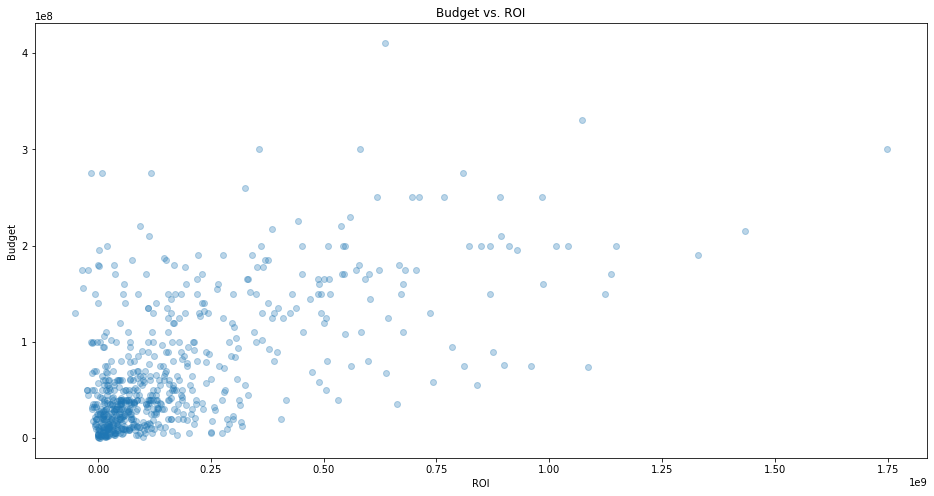

In [115]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=triple_df['roi'],
    y=triple_df['production_budget'],
    alpha=0.3
)

ax.set_xlabel("ROI")
ax.set_ylabel("Budget")
ax.set_title("Budget vs. ROI");

In [116]:
triple_df.sort_values(by=['roi'], ascending=False).head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000,1369000000,2047800000,2018-04-27,300000000.0,2.048134e+09,1.748134e+09
Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000,1019000000,1671300000,2015-06-12,215000000.0,1.648855e+09,1.433855e+09
Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000,1163000000,1516000000,2015-04-03,190000000.0,1.518723e+09,1.328723e+09
Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000,646900000,1347000000,2018-02-16,200000000.0,1.348258e+09,1.148258e+09
Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000,891800000,1309500000,2018-06-22,170000000.0,1.305773e+09,1.135773e+09
Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000,875700000,1276400000,2013-11-22,150000000.0,1.272470e+09,1.122470e+09
Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,336000000,823400000,1159400000,2015-07-10,74000000.0,1.160336e+09,1.086336e+09
Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000,946400000,1405400000,2015-05-01,330600000.0,1.403014e+09,1.072414e+09
Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510,608600000,634200000,1242800000,2018-06-15,200000000.0,1.242521e+09,1.042521e+09
Iron Man 3,130.0,"Action,Adventure,Sci-Fi",7.2,692794,409000000,805800000,1214800000,2013-05-03,200000000.0,1.215392e+09,1.015392e+09


In [76]:
triple_df.sort_values(by=['total_gross'], ascending=False).head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000,1369000000,2047800000,2018-04-27,300000000.0,2.048134e+09,1.748134e+09
Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000,1019000000,1671300000,2015-06-12,215000000.0,1.648855e+09,1.433855e+09
Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000,1163000000,1516000000,2015-04-03,190000000.0,1.518723e+09,1.328723e+09
Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000,946400000,1405400000,2015-05-01,330600000.0,1.403014e+09,1.072414e+09
Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000,646900000,1347000000,2018-02-16,200000000.0,1.348258e+09,1.148258e+09
Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000,891800000,1309500000,2018-06-22,170000000.0,1.305773e+09,1.135773e+09
Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000,875700000,1276400000,2013-11-22,150000000.0,1.272470e+09,1.122470e+09
Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510,608600000,634200000,1242800000,2018-06-15,200000000.0,1.242521e+09,1.042521e+09
The Fate of the Furious,136.0,"Action,Crime,Thriller",6.7,179774,226000000,1010000000,1236000000,2017-04-14,250000000.0,1.234846e+09,9.848463e+08
Iron Man 3,130.0,"Action,Adventure,Sci-Fi",7.2,692794,409000000,805800000,1214800000,2013-05-03,200000000.0,1.215392e+09,1.015392e+09


In [77]:
triple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 649 entries, 10 Cloverfield Lane to Zootopia
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   runtime_minutes    649 non-null    float64       
 1   genres             649 non-null    object        
 2   averagerating      649 non-null    float64       
 3   numvotes           649 non-null    int64         
 4   domestic_gross     649 non-null    int32         
 5   foreign_gross      649 non-null    int32         
 6   total_gross        649 non-null    int32         
 7   release_date       649 non-null    datetime64[ns]
 8   production_budget  649 non-null    float64       
 9   worldwide_gross    649 non-null    float64       
 10  roi                649 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1), object(1)
memory usage: 53.2+ KB


In [78]:
triple_df.sort_values(by=['roi'], ascending=False).head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,678800000,1369000000,2047800000,2018-04-27,300000000.0,2.048134e+09,1.748134e+09
Jurassic World,124.0,"Action,Adventure,Sci-Fi",7.0,539338,652300000,1019000000,1671300000,2015-06-12,215000000.0,1.648855e+09,1.433855e+09
Furious 7,137.0,"Action,Crime,Thriller",7.2,335074,353000000,1163000000,1516000000,2015-04-03,190000000.0,1.518723e+09,1.328723e+09
Black Panther,134.0,"Action,Adventure,Sci-Fi",7.3,516148,700100000,646900000,1347000000,2018-02-16,200000000.0,1.348258e+09,1.148258e+09
Jurassic World: Fallen Kingdom,128.0,"Action,Adventure,Sci-Fi",6.2,219125,417700000,891800000,1309500000,2018-06-22,170000000.0,1.305773e+09,1.135773e+09
Frozen,102.0,"Adventure,Animation,Comedy",7.5,516998,400700000,875700000,1276400000,2013-11-22,150000000.0,1.272470e+09,1.122470e+09
Minions,91.0,"Adventure,Animation,Comedy",6.4,193917,336000000,823400000,1159400000,2015-07-10,74000000.0,1.160336e+09,1.086336e+09
Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,459000000,946400000,1405400000,2015-05-01,330600000.0,1.403014e+09,1.072414e+09
Incredibles 2,118.0,"Action,Adventure,Animation",7.7,203510,608600000,634200000,1242800000,2018-06-15,200000000.0,1.242521e+09,1.042521e+09
Iron Man 3,130.0,"Action,Adventure,Sci-Fi",7.2,692794,409000000,805800000,1214800000,2013-05-03,200000000.0,1.215392e+09,1.015392e+09


In [79]:
##### RELEASE DATES / WORLDWIDEGROSS

In [80]:
triple_df['genres'].value_counts().head(20)

Action,Adventure,Sci-Fi       43
Adventure,Animation,Comedy    30
Action,Adventure,Fantasy      26
Comedy                        22
Action,Adventure,Drama        19
Comedy,Drama,Romance          19
Drama,Romance                 17
Comedy,Romance                17
Action,Crime,Drama            16
Action,Comedy,Crime           15
Action,Adventure,Comedy       15
Action,Thriller               13
Comedy,Drama                  13
Action,Crime,Thriller         13
Drama                         12
Action,Adventure,Animation    12
Biography,Drama,History       11
Crime,Drama,Thriller          10
Action,Drama,Thriller         10
Horror,Mystery,Thriller       10
Name: genres, dtype: int64

In [81]:
triple_df.columns

Index(['runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'domestic_gross', 'foreign_gross', 'total_gross', 'release_date',
       'production_budget', 'worldwide_gross', 'roi'],
      dtype='object')

In [82]:
# Rename all the columns to capitalize
# # Rename all the columns to lower case
# df.columns = [col.lower() for col in df.columns]
# triple_df.columns = [col.capitalize() for col in triple_df.columns]

In [83]:
triple_df.head(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
10 Cloverfield Lane,103.0,"Drama,Horror,Mystery",7.2,260383,72100000,38100000,110200000,2016-03-11,5000000.0,1.082864e+08,1.032864e+08
12 Years a Slave,134.0,"Biography,Drama,History",8.1,577301,56700000,131100000,187800000,2013-10-18,20000000.0,1.810253e+08,1.610253e+08
127 Hours,94.0,"Adventure,Biography,Drama",7.6,323949,18300000,42400000,60700000,2010-11-05,18000000.0,6.021717e+07,4.221717e+07
2 Guns,109.0,"Action,Comedy,Crime",6.7,182025,75600000,56300000,131900000,2013-08-02,61000000.0,1.324930e+08,7.149302e+07
21 Jump Street,109.0,"Action,Comedy,Crime",7.2,477771,138400000,63100000,201500000,2012-03-16,42000000.0,2.028124e+08,1.608124e+08
22 Jump Street,112.0,"Action,Comedy,Crime",7.0,319504,191700000,139600000,331300000,2014-06-13,50000000.0,3.313339e+08,2.813339e+08
3 Days to Kill,117.0,"Action,Drama,Thriller",6.2,81681,30700000,21900000,52600000,2014-02-21,28000000.0,3.895990e+07,1.095990e+07
30 Minutes or Less,83.0,"Action,Comedy,Crime",6.1,87254,37100000,3500000,40600000,2011-08-12,28000000.0,4.096672e+07,1.296672e+07
47 Ronin,128.0,"Action,Adventure,Drama",6.3,135754,38400000,113400000,151800000,2013-12-25,175000000.0,1.517168e+08,-2.328318e+07
50/50,100.0,"Comedy,Drama,Romance",7.7,300475,35000000,4200000,39200000,2011-09-30,8000000.0,4.133474e+07,3.333474e+07


In [84]:
def contains_action(text):
    if 'Action' in text:
        return True
    else:
        return False

In [85]:
triple_df['genres'].map(contains_action).sum()

270

In [86]:
def contains_adventure(text):
    if 'Adventure' in text:
        return True
    else:
        return False

In [87]:
triple_df['genres'].map(contains_adventure).sum()

215

In [88]:
def contains_scifi(text):
    if 'Sci-Fi' in text:
        return True
    else:
        return False

In [89]:
triple_df['genres'].map(contains_scifi).sum()

90

In [90]:
def contains_comedy(text):
    if 'Comedy' in text:
        return True
    else:
        return False

In [91]:
triple_df['genres'].map(contains_comedy).sum()

211

In [92]:
def contains_drama(text):
    if 'Drama' in text:
        return True
    else:
        return False

In [93]:
triple_df['genres'].map(contains_drama).sum()

292

In [94]:
def contains_romance(text):
    if 'Romance' in text:
        return True
    else:
        return False

In [95]:
triple_df['genres'].map(contains_romance).sum()

79

In [96]:
def contains_fantasy(text):
    if 'Fantasy' in text:
        return True
    else:
        return False

In [97]:
triple_df['genres'].map(contains_fantasy).sum()

65

In [98]:
def contains_crime(text):
    if 'Crime' in text:
        return True
    else:
        return False

In [99]:
triple_df['genres'].map(contains_crime).sum()

107

In [100]:
def contains_crime(text):
    if 'Crime' in text:
        return True
    else:
        return False

In [101]:
triple_df['genres'].map(contains_crime).sum()

107

In [102]:
def contains_music(text):
    if 'Music' in text:
        return True
    else:
        return False

In [103]:
triple_df['genres'].map(contains_music).sum()

16

In [104]:
def contains_thriller(text):
    if 'Thriller' in text:
        return True
    else:
        return False

In [105]:
triple_df['genres'].map(contains_thriller).sum()

121

In [106]:
triple_df.sort_values(by=['roi'], ascending=False).tail(60)

,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross,total_gross,release_date,production_budget,worldwide_gross,roi
The Losers,97.0,"Action,Adventure,Crime",6.4,83876,23600000,5800000,29400000,2010-04-23,25000000.0,29863840.0,4863840.0
The Raven,110.0,"Crime,Mystery,Thriller",6.4,79578,16000000,13600000,29600000,2012-04-27,26000000.0,30601801.0,4601801.0
We Need to Talk About Kevin,112.0,"Drama,Mystery,Thriller",7.5,123619,1700000,4300000,6000000,2012-01-13,7000000.0,10765283.0,3765283.0
A Monster Calls,108.0,"Animation,Drama,Fantasy",7.5,70416,3700000,43600000,47300000,2017-01-06,43000000.0,46414530.0,3414530.0
Transcendence,119.0,"Action,Drama,Sci-Fi",6.3,204481,23000000,80000000,103000000,2014-04-18,100000000.0,103039258.0,3039258.0
Jupiter Ascending,127.0,"Action,Adventure,Sci-Fi",5.3,166327,47400000,136600000,184000000,2015-02-06,179000000.0,181982519.0,2982519.0
Jack the Giant Slayer,114.0,"Adventure,Fantasy",6.3,123127,65200000,132500000,197700000,2013-03-01,195000000.0,197687603.0,2687603.0
Submarine,97.0,"Comedy,Drama,Romance",7.3,79810,468000,397000,865000,2011-06-03,1900000.0,4581937.0,2681937.0
American Ultra,96.0,"Action,Comedy,Sci-Fi",6.1,76769,14400000,12700000,27100000,2015-08-21,28000000.0,30295028.0,2295028.0
Another Earth,92.0,"Drama,Romance,Sci-Fi",7.0,85839,1300000,456000,1756000,2011-07-22,175000.0,2102779.0,1927779.0


In [107]:
#################### VISUAL EXAMPLES################################
#import matplotlib.pyplot as plt

# Set up figure and axes
#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))
#fig.set_tight_layout(True)

# Histogram of Wins and Frequencies
#ax1.hist(x=wins, bins=range(8), align="left", color="green")
#ax1.set_xticks(range(7))
#ax1.set_xlabel("Wins in 2018 World Cup")
#ax1.set_ylabel("Frequency")
#ax1.set_title("Distribution of Wins")

## Horizontal Bar Graph of Wins by Country
#ax2.barh(teams[::-1], wins[::-1], color="green")
#ax2.set_xlabel("Wins in 2018 World Cup")
#ax2.set_title("Wins by Country");

##################################################################
# Set up figure
#fig, ax = plt.subplots(figsize=(8, 5))

# Basic scatter plot
#ax.scatter(
#    x=populations,
#    y=wins,
#    color="gray", alpha=0.5, s=100
#)
#ax.set_xlabel("2018 Population")
#ax.set_ylabel("2018 World Cup Wins")
#ax.set_title("Population vs. World Cup Wins")

# Add annotations for specific points of interest
#highlighted_points = {
#    "Belgium": 2, # Numbers are the index of that
#    "Brazil": 3,  # country in populations & wins
#    "France": 10,
#    "Nigeria": 17
#}
#for country, index in highlighted_points.items():
    # Get x and y position of data point
#    x = populations[index]
#    y = wins[index]
    # Move each point slightly down and to the left
    # (numbers were chosen by manually tweaking)
#    xtext = x - (1.25e6 * len(country))
#    ytext = y - 0.5
    # Annotate with relevant arguments
#    ax.annotate(
#        text=country,
#        xy=(x, y),
#        xytext=(xtext, ytext)
#    )

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

Questions to consider:

* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?

In [108]:
###usa_2016_gold_medals = []

##for row in olympics_data:
##    if row["Medal"] == "G" and row["Nationality"] == "USA" and row["Year"] == "2016":
##        usa_2016_gold_medals.append({"Event": row["Event"], "Name": row["Name"]})
        
## usa_2016_gold_medals

## Evaluation

Evaluate how well your work solves the stated business problem.

Questions to consider:

* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.


Questions to consider:

* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?